# CARRADA Dataset: Camera and Automotive Radar with Range-Angle-Doppler Annotations

This notebook shows samples of annotated radar data and how to use utils functions

In [33]:
%matplotlib inline
import os
import json
import numpy as np
from IPython.display import Image

from carrada_dataset.utils import CARRADA_HOME
from carrada_dataset.utils.configurable import Configurable
from carrada_dataset.utils.visualize_signal import SignalVisualizer
from carrada_dataset.utils.transform_annotations import AnnotationTransformer
from carrada_dataset.utils.generate_annotations import AnnotationGenerator
from carrada_dataset.utils.transform_data import DataTransformer

In [34]:
# Set path
%run ./scripts/set_path.py '/home/yahia/Downloads/'

<Figure size 640x480 with 0 Axes>

In [35]:
# Sample to visualize
# seq_name = '2019-09-16-13-20-20'
# instances = ['000670', '000673']
# frame_name = '000100'
seq_name = '2019-09-16-13-18-33'
instances = ['000015', '000228']
frame_name = '000100'

Camera image of the scene 2019-09-16-13-18-33, frame 000100


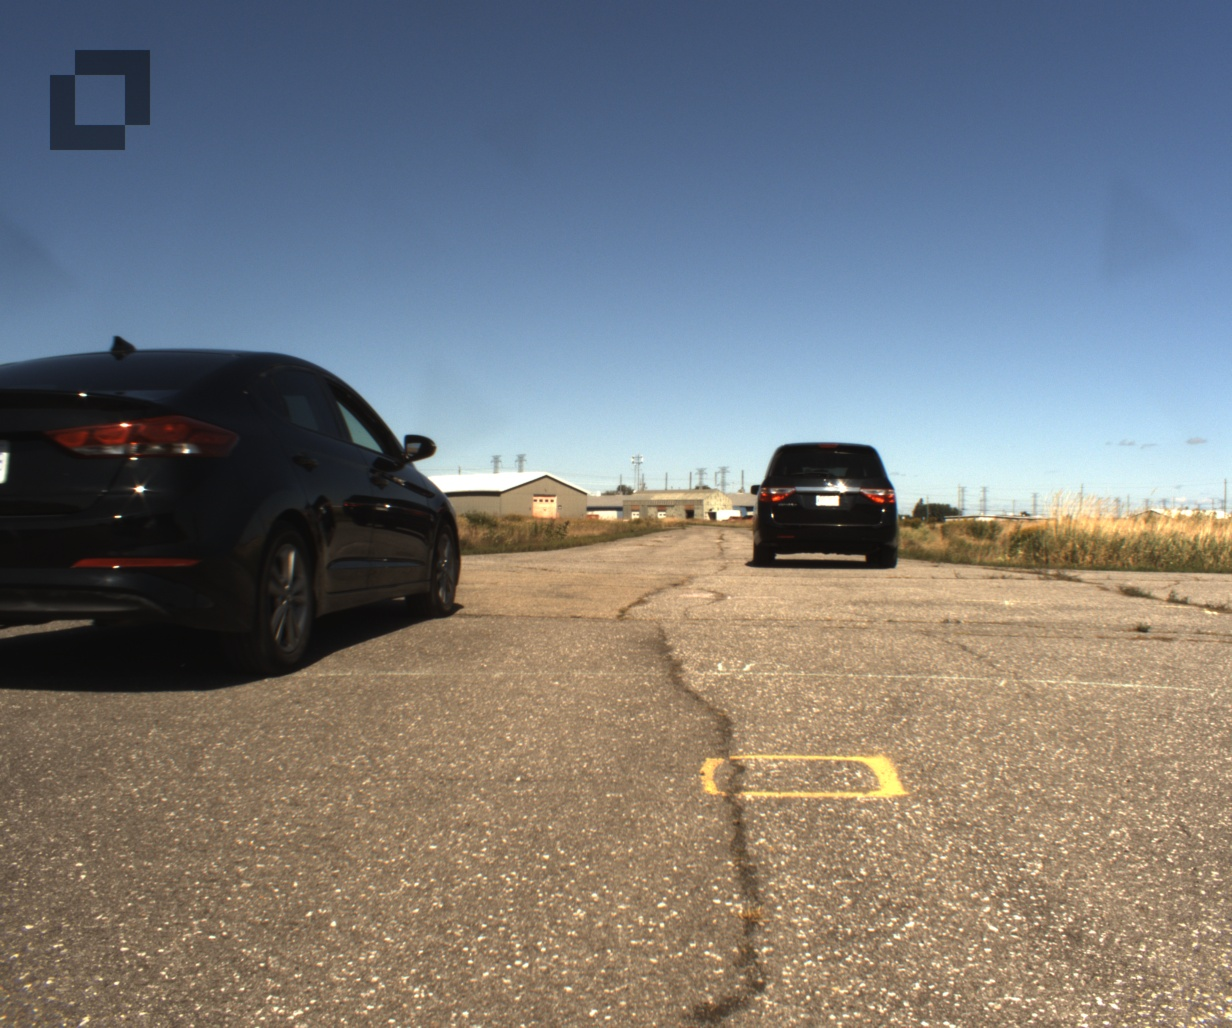

In [36]:
# Define paths
config_path = os.path.join(CARRADA_HOME, 'config.ini')
config = Configurable(config_path).config
warehouse = config['data']['warehouse']
carrada = os.path.join(warehouse, 'Carrada')
seq_path = os.path.join(carrada, seq_name)
rd_path = os.path.join(seq_path, 'range_doppler_numpy', frame_name + '.npy')
ra_path = os.path.join(seq_path, 'range_angle_numpy', frame_name + '.npy')
ad_path = os.path.join(seq_path, 'angle_doppler_processed', frame_name + '.npy')
img_path = os.path.join(seq_path, 'camera_images', frame_name + '.jpg')

'''
# Path to the RAD tensor (soon available)
rad_path = os.path.join(seq_path, 'RAD_numpy', frame_name + '.npy')
'''

annotations_path = os.path.join(carrada, 'annotations_frame_oriented.json')
# Load data

# Annotations
with open(annotations_path, 'r') as fp:
    annotations = json.load(fp)
annotations = annotations[seq_name][frame_name]  # Keep annotations of interest

# Range-angle and range-Doppler matrices
'''
# the RA and RD matrices can be computed directly from the RAD tensor
rad_matrix = np.load(rad_path)
data_transformer = DataTransformer(rad_matrix)
ra_matrix = data_transformer.to_ra()
rd_matrix = data_transformer.to_rd()
'''
ra_matrix = np.load(ra_path)
rd_matrix = np.load(rd_path)
ad_matrix = np.load(ad_path)
# Camera image of the scene
print('Camera image of the scene {}, frame {}'.format(seq_name, frame_name))
img = Image(img_path)
display(img)

Raw Range-Doppler representation:


<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?


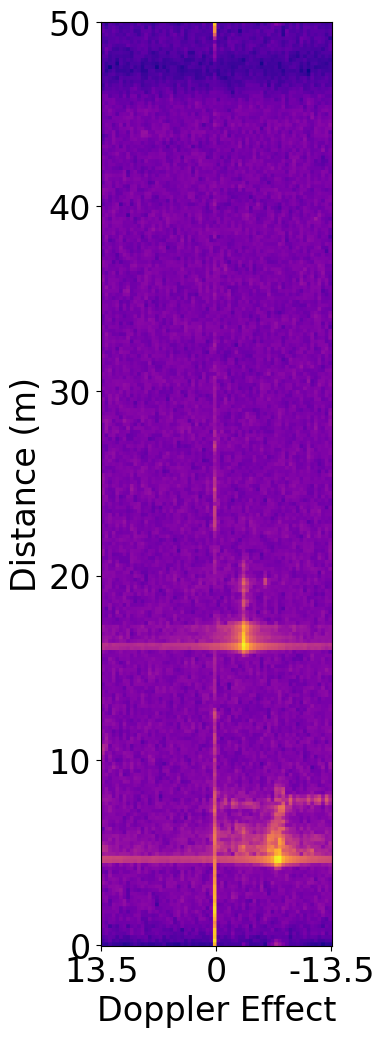

/tmp/ipykernel_27967/3384754158.py:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if annotation_type is 'sparse':
/tmp/ipykernel_27967/3384754158.py:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif annotation_type is 'dense':
/tmp/ipykernel_27967/3384754158.py:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if annotation_type is 'sparse':
/tmp/ipykernel_27967/3384754158.py:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif annotation_type is 'dense':
/tmp/ipykernel_27967/3384754158.py:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if annotation_type is 'sparse':
/tmp/ipykernel_27967/3384754158.py:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif annotation_type is 'dense':
/tmp/ipykernel_27967/3384754158.py:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if annotation_type is 'sparse':
/tmp/ipykernel_27967/3384754158.py:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif anno

KeyError: '000015'

In [37]:
signal_visualizer = SignalVisualizer(rd_matrix)
print('Raw Range-Doppler representation:')
signal_visualizer.save_scale(path='.', signal_type='range_doppler', color_scale=False,
                             rotation=True, save_img=False, plot_img=True)
for annotation_type in ['sparse', 'dense', 'box']:
    for i, instance in enumerate(instances):
        points = annotations[instance]['range_doppler'][annotation_type]
        annot_generator = AnnotationGenerator(rd_matrix.shape, points)
        if annotation_type is 'sparse':
            annots = annot_generator.get_points()
        elif annotation_type is 'dense':
            annots = annot_generator.get_mask()
        else:
            annots = annot_generator.get_box()
        signal_visualizer.add_annotation(i, annots, annotation_type)
    print('Range-Doppler with {} annotations:'.format(annotation_type))
    signal_visualizer.save_multiple_annotations(path='/root/workspace/temp/rd_{}.png'.format(annotation_type),
                                                signal_type='range_doppler', color_scale=False,
                                                rotation=True, save_img=False, plot_img=True)
    signal_visualizer.reset_annotation()


<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:15: SyntaxWarning: "is" with a literal. Did you mean "=="?


Raw Range-Angle representation:


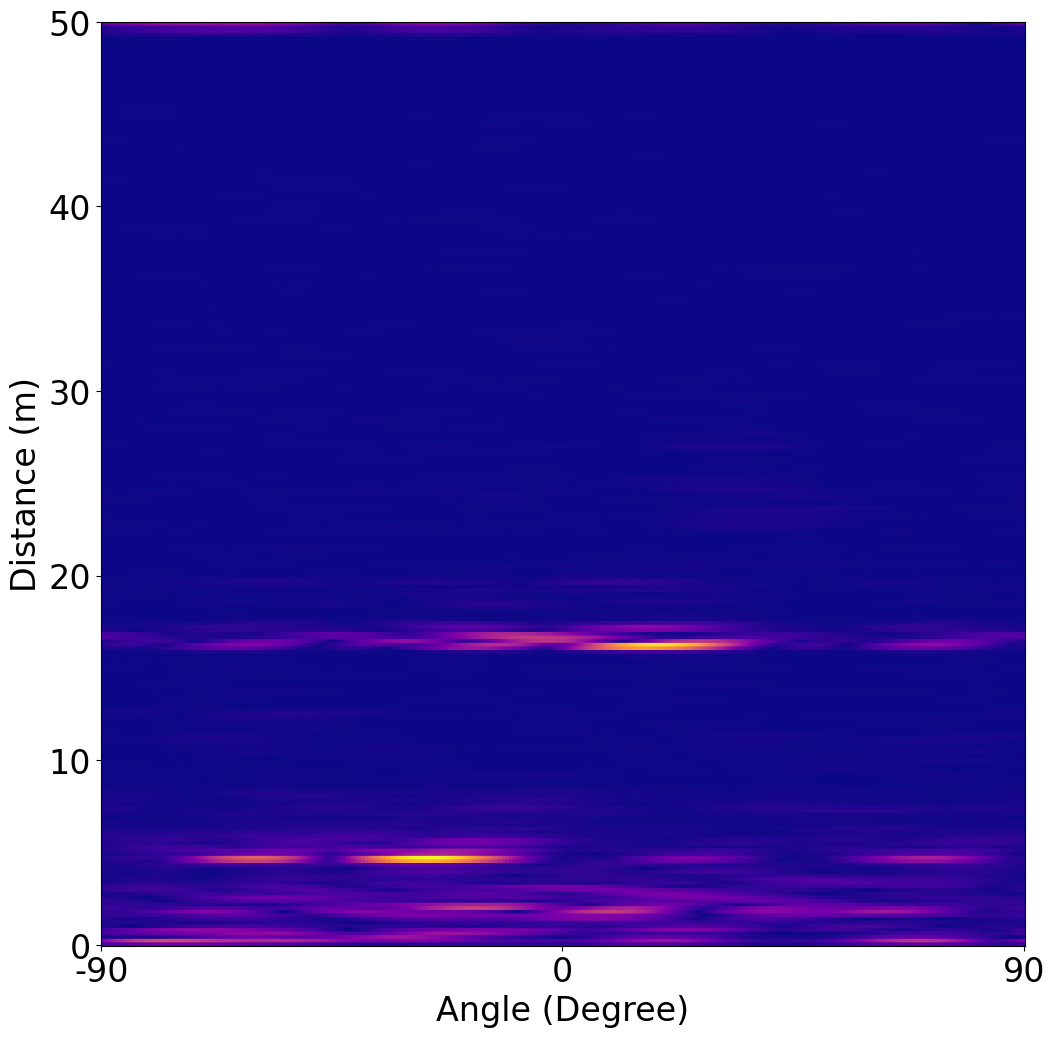

/tmp/ipykernel_27967/928262040.py:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if annotation_type is 'sparse':
/tmp/ipykernel_27967/928262040.py:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif annotation_type is 'dense':
/tmp/ipykernel_27967/928262040.py:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if annotation_type is 'sparse':
/tmp/ipykernel_27967/928262040.py:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif annotation_type is 'dense':
/tmp/ipykernel_27967/928262040.py:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if annotation_type is 'sparse':
/tmp/ipykernel_27967/928262040.py:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif annotation_type is 'dense':
/tmp/ipykernel_27967/928262040.py:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if annotation_type is 'sparse':
/tmp/ipykernel_27967/928262040.py:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif annotati

KeyError: '000015'

In [38]:
# Range-Angle visualization
# Range-Angle visualization
# Range-Doppler visualization

signal_visualizer = SignalVisualizer(ra_matrix)
print('Raw Range-Angle representation:')
signal_visualizer.save_scale(path='.', signal_type='range_angle', color_scale=False,
                             rotation=False, save_img=False, plot_img=True)
for annotation_type in ['sparse', 'dense', 'box']:
    for i, instance in enumerate(instances):
        points = annotations[instance]['range_angle'][annotation_type]
        annot_generator = AnnotationGenerator(ra_matrix.shape, points)
        if annotation_type is 'sparse':
            annots = annot_generator.get_points()
        elif annotation_type is 'dense':
            annots = annot_generator.get_mask()
        else:
            annots = annot_generator.get_box()
        signal_visualizer.add_annotation(i, annots, annotation_type)
    print('Range-Angle with {} annotations:'.format(annotation_type))
    signal_visualizer.save_multiple_annotations(path='/root/workspace/temp/ra_{}.png'.format(annotation_type),
                                                signal_type='range_angle', color_scale=False,
                                                rotation=False, save_img=False, plot_img=True)
    signal_visualizer.reset_annotation()

Raw Angle-Doppler representation:


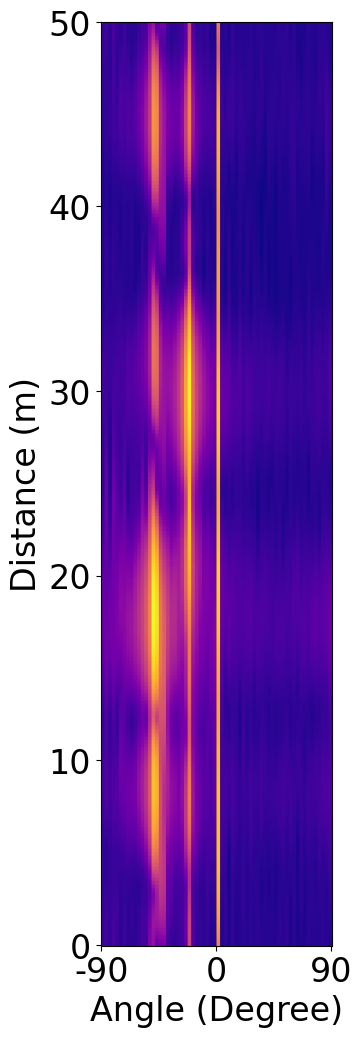

Range-Angle with sparse annotations:


Exception: You need to add annotation before visualize it!

In [39]:

signal_visualizer = SignalVisualizer(ad_matrix)
print('Raw Angle-Doppler representation:')
signal_visualizer.save_scale(path='.', signal_type='angle_doppler', color_scale=False,
                             rotation=False, save_img=False, plot_img=True)
print('Range-Angle with {} annotations:'.format(annotation_type))
signal_visualizer.save_multiple_annotations(path='/root/workspace/temp/ra_{}.png'.format(annotation_type),
                                            signal_type='range_angle', color_scale=False,
                                            rotation=False, save_img=False, plot_img=True)
signal_visualizer.reset_annotation()

In [30]:
# Sample to visualize
# seq_name = '2019-09-16-13-20-20'
# instances = ['000670', '000673']
# frame_name = '000100'
seq_name = '2020-02-28-12-23-30'
instances = ['000010', '000228']
frame_name = '000121'

Camera image of the scene 2020-02-28-12-23-30, frame 000121


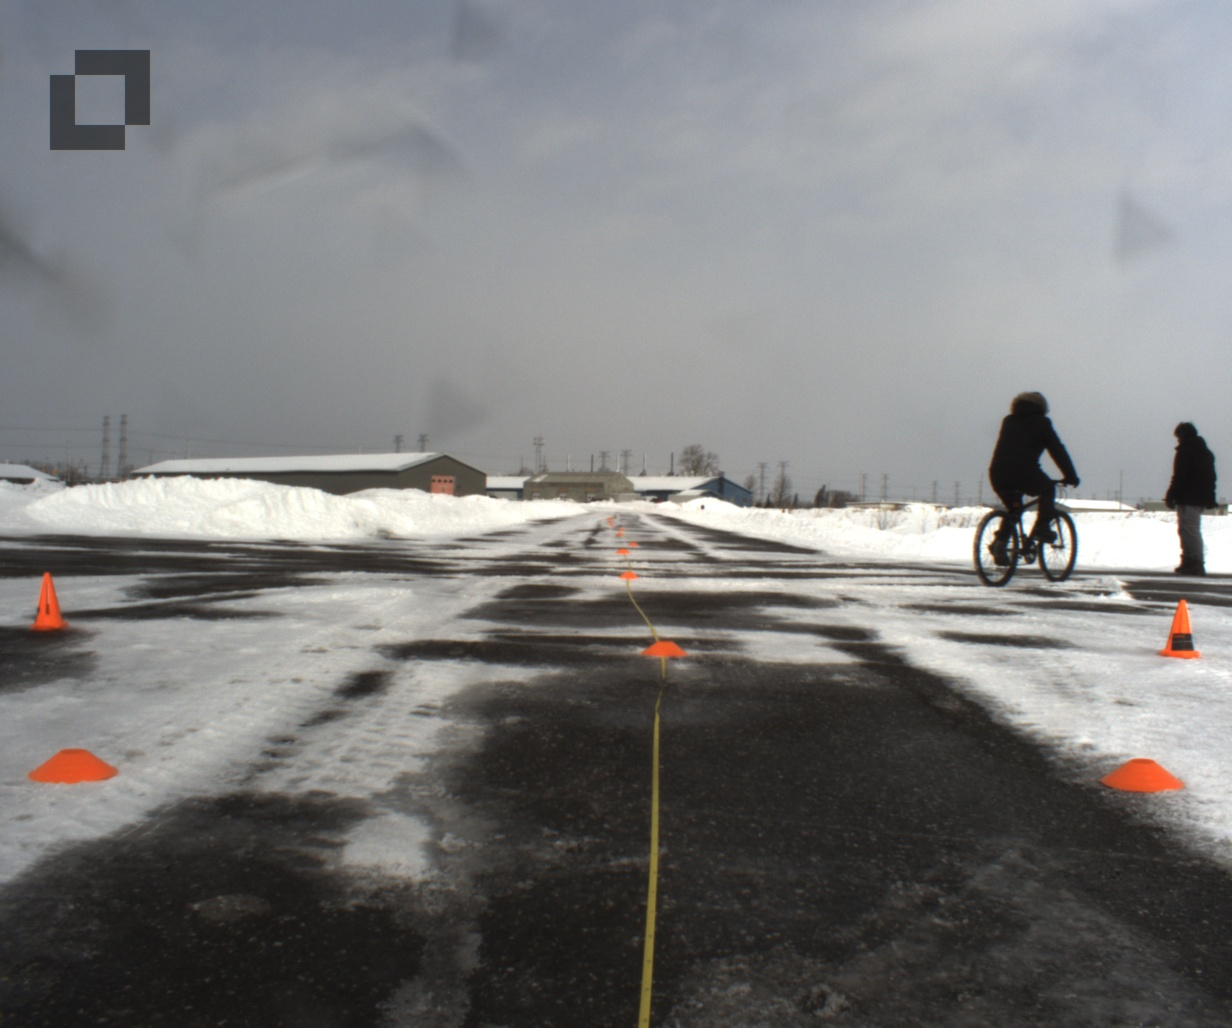

In [31]:
# Define paths
config_path = os.path.join(CARRADA_HOME, 'config.ini')
config = Configurable(config_path).config
warehouse = config['data']['warehouse']
carrada = os.path.join(warehouse, 'Carrada')
seq_path = os.path.join(carrada, seq_name)
rd_path = os.path.join(seq_path, 'range_doppler_numpy', frame_name + '.npy')
ra_path = os.path.join(seq_path, 'range_angle_numpy', frame_name + '.npy')
ad_path = os.path.join(seq_path, 'angle_doppler_processed', frame_name + '.npy')
img_path = os.path.join(seq_path, 'camera_images', frame_name + '.jpg')

'''
# Path to the RAD tensor (soon available)
rad_path = os.path.join(seq_path, 'RAD_numpy', frame_name + '.npy')
'''

annotations_path = os.path.join(carrada, 'annotations_frame_oriented.json')
# Load data

# Annotations
with open(annotations_path, 'r') as fp:
    annotations = json.load(fp)
annotations = annotations[seq_name][frame_name]  # Keep annotations of interest

# Range-angle and range-Doppler matrices
'''
# the RA and RD matrices can be computed directly from the RAD tensor
rad_matrix = np.load(rad_path)
data_transformer = DataTransformer(rad_matrix)
ra_matrix = data_transformer.to_ra()
rd_matrix = data_transformer.to_rd()
'''
ra_matrix = np.load(ra_path)
rd_matrix = np.load(rd_path)
ad_matrix = np.load(ad_path)
# Camera image of the scene
print('Camera image of the scene {}, frame {}'.format(seq_name, frame_name))
img = Image(img_path)
display(img)

In [44]:
# Sample to visualize
# seq_name = '2019-09-16-13-20-20'
# instances = ['000670', '000673']
# frame_name = '000100'
seq_name = '2020-02-28-13-08-51'
instances = ['000015', '000228']
frame_name = '000130'

Camera image of the scene 2020-02-28-13-08-51, frame 000130


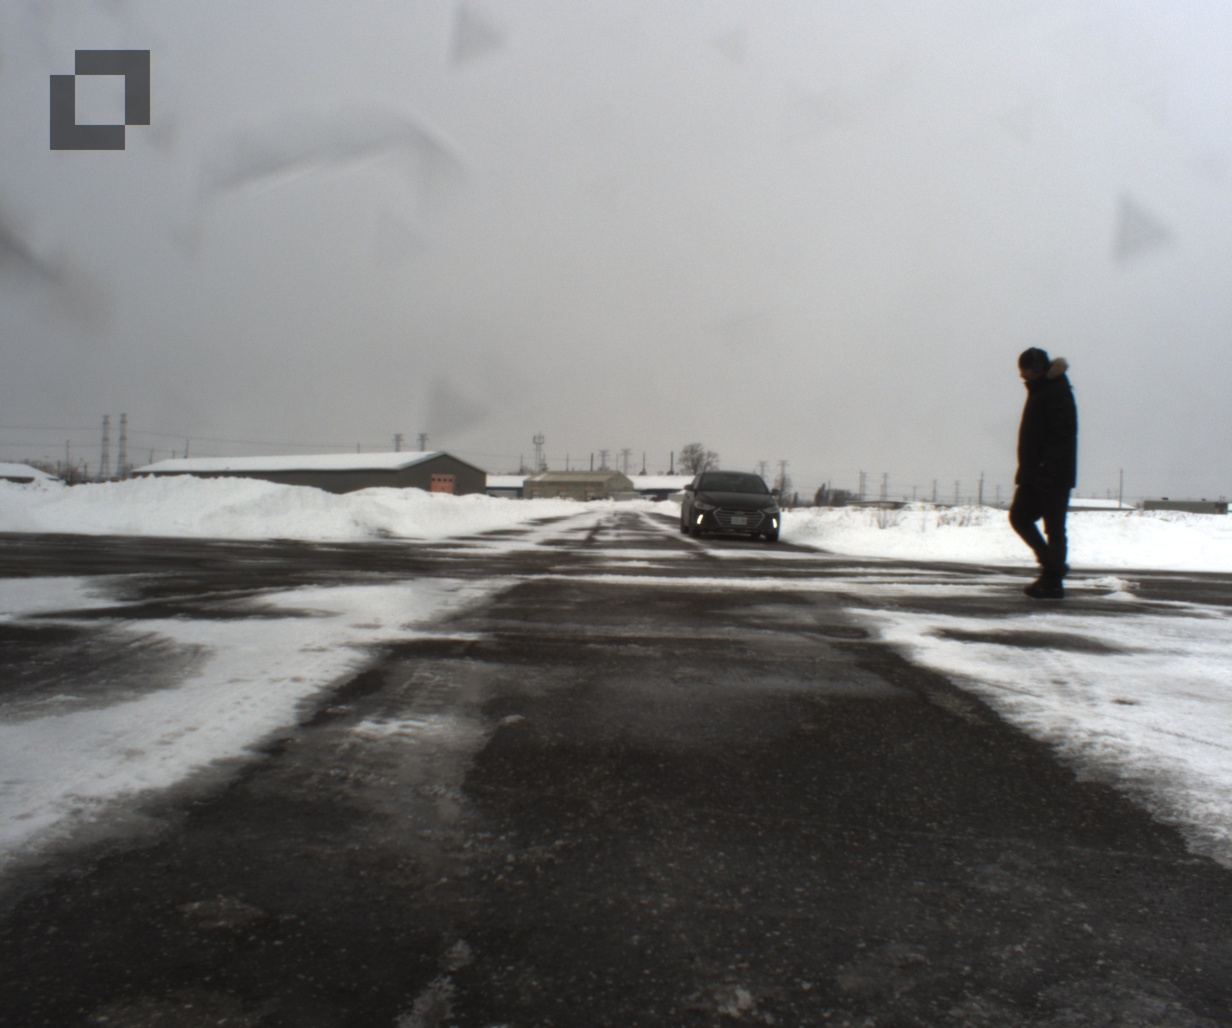

In [45]:
# Define paths
config_path = os.path.join(CARRADA_HOME, 'config.ini')
config = Configurable(config_path).config
warehouse = config['data']['warehouse']
carrada = os.path.join(warehouse, 'Carrada')
seq_path = os.path.join(carrada, seq_name)
rd_path = os.path.join(seq_path, 'range_doppler_numpy', frame_name + '.npy')
ra_path = os.path.join(seq_path, 'range_angle_numpy', frame_name + '.npy')
ad_path = os.path.join(seq_path, 'angle_doppler_processed', frame_name + '.npy')
img_path = os.path.join(seq_path, 'camera_images', frame_name + '.jpg')

'''
# Path to the RAD tensor (soon available)
rad_path = os.path.join(seq_path, 'RAD_numpy', frame_name + '.npy')
'''

annotations_path = os.path.join(carrada, 'annotations_frame_oriented.json')
# Load data

# Annotations
with open(annotations_path, 'r') as fp:
    annotations = json.load(fp)
annotations = annotations[seq_name][frame_name]  # Keep annotations of interest

# Range-angle and range-Doppler matrices
'''
# the RA and RD matrices can be computed directly from the RAD tensor
rad_matrix = np.load(rad_path)
data_transformer = DataTransformer(rad_matrix)
ra_matrix = data_transformer.to_ra()
rd_matrix = data_transformer.to_rd()
'''
ra_matrix = np.load(ra_path)
rd_matrix = np.load(rd_path)
ad_matrix = np.load(ad_path)
# Camera image of the scene
print('Camera image of the scene {}, frame {}'.format(seq_name, frame_name))
img = Image(img_path)
display(img)

Raw Range-Doppler representation:


<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?


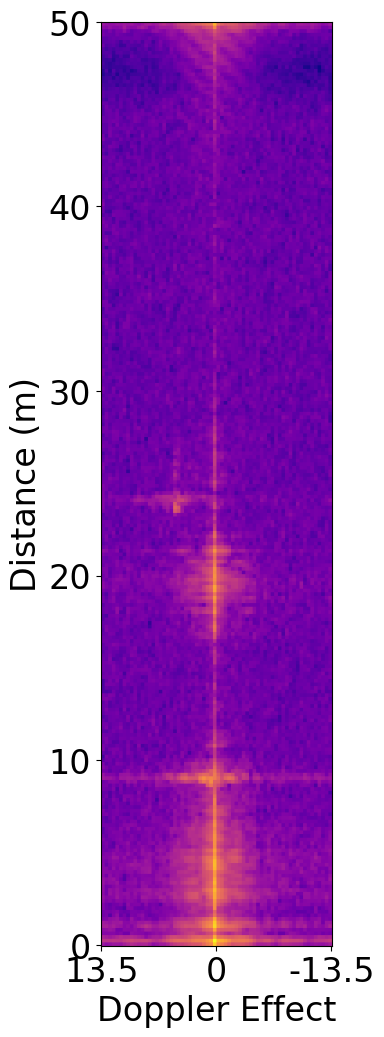

/tmp/ipykernel_27967/3384754158.py:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if annotation_type is 'sparse':
/tmp/ipykernel_27967/3384754158.py:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif annotation_type is 'dense':
/tmp/ipykernel_27967/3384754158.py:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if annotation_type is 'sparse':
/tmp/ipykernel_27967/3384754158.py:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif annotation_type is 'dense':
/tmp/ipykernel_27967/3384754158.py:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if annotation_type is 'sparse':
/tmp/ipykernel_27967/3384754158.py:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif annotation_type is 'dense':
/tmp/ipykernel_27967/3384754158.py:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if annotation_type is 'sparse':
/tmp/ipykernel_27967/3384754158.py:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif anno

KeyError: '000015'

In [42]:
signal_visualizer = SignalVisualizer(rd_matrix)
print('Raw Range-Doppler representation:')
signal_visualizer.save_scale(path='.', signal_type='range_doppler', color_scale=False,
                             rotation=True, save_img=False, plot_img=True)
for annotation_type in ['sparse', 'dense', 'box']:
    for i, instance in enumerate(instances):
        points = annotations[instance]['range_doppler'][annotation_type]
        annot_generator = AnnotationGenerator(rd_matrix.shape, points)
        if annotation_type is 'sparse':
            annots = annot_generator.get_points()
        elif annotation_type is 'dense':
            annots = annot_generator.get_mask()
        else:
            annots = annot_generator.get_box()
        signal_visualizer.add_annotation(i, annots, annotation_type)
    print('Range-Doppler with {} annotations:'.format(annotation_type))
    signal_visualizer.save_multiple_annotations(path='/root/workspace/temp/rd_{}.png'.format(annotation_type),
                                                signal_type='range_doppler', color_scale=False,
                                                rotation=True, save_img=False, plot_img=True)
    signal_visualizer.reset_annotation()


<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:15: SyntaxWarning: "is" with a literal. Did you mean "=="?


Raw Range-Angle representation:


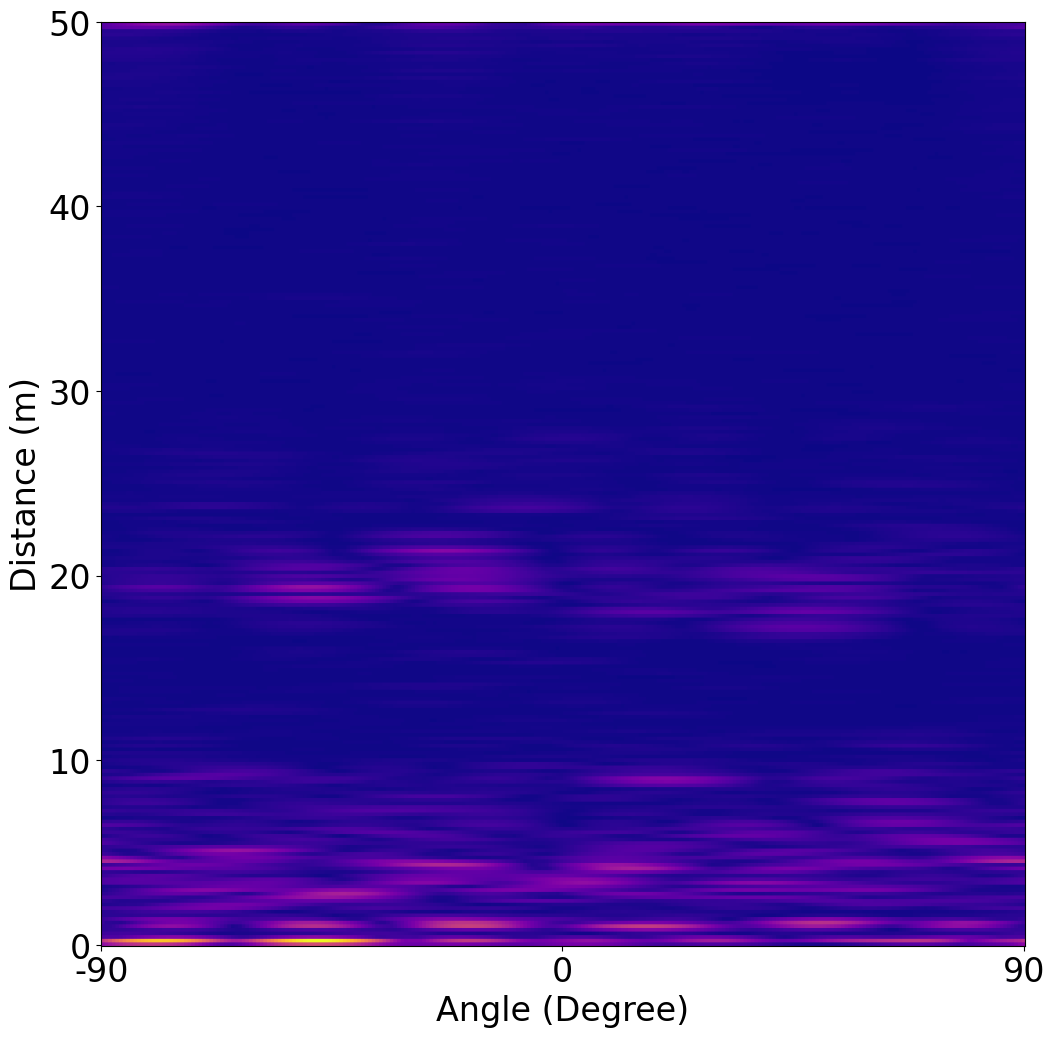

/tmp/ipykernel_27967/928262040.py:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if annotation_type is 'sparse':
/tmp/ipykernel_27967/928262040.py:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif annotation_type is 'dense':
/tmp/ipykernel_27967/928262040.py:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if annotation_type is 'sparse':
/tmp/ipykernel_27967/928262040.py:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif annotation_type is 'dense':
/tmp/ipykernel_27967/928262040.py:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if annotation_type is 'sparse':
/tmp/ipykernel_27967/928262040.py:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif annotation_type is 'dense':
/tmp/ipykernel_27967/928262040.py:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if annotation_type is 'sparse':
/tmp/ipykernel_27967/928262040.py:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif annotati

KeyError: '000015'

In [47]:
# Range-Angle visualization
# Range-Angle visualization
# Range-Doppler visualization

signal_visualizer = SignalVisualizer(ra_matrix)
print('Raw Range-Angle representation:')
signal_visualizer.save_scale(path='.', signal_type='range_angle', color_scale=False,
                             rotation=False, save_img=False, plot_img=True)
for annotation_type in ['sparse', 'dense', 'box']:
    for i, instance in enumerate(instances):
        points = annotations[instance]['range_angle'][annotation_type]
        annot_generator = AnnotationGenerator(ra_matrix.shape, points)
        if annotation_type is 'sparse':
            annots = annot_generator.get_points()
        elif annotation_type is 'dense':
            annots = annot_generator.get_mask()
        else:
            annots = annot_generator.get_box()
        signal_visualizer.add_annotation(i, annots, annotation_type)
    print('Range-Angle with {} annotations:'.format(annotation_type))
    signal_visualizer.save_multiple_annotations(path='/root/workspace/temp/ra_{}.png'.format(annotation_type),
                                                signal_type='range_angle', color_scale=False,
                                                rotation=False, save_img=False, plot_img=True)
    signal_visualizer.reset_annotation()

Raw Angle-Doppler representation:


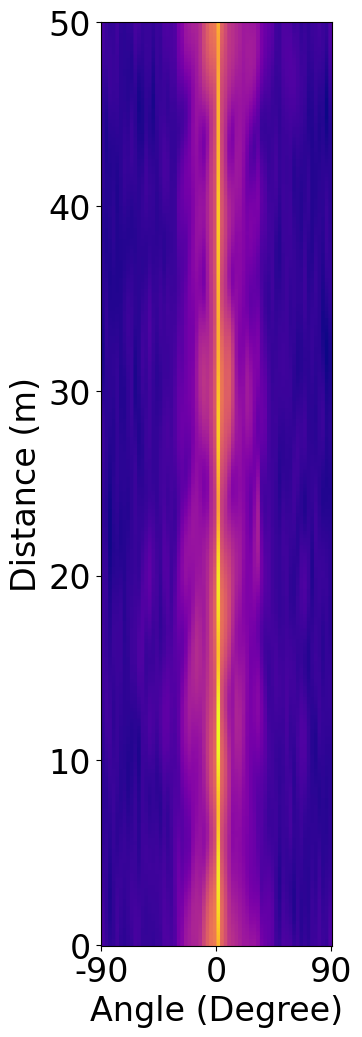

Range-Angle with sparse annotations:


Exception: You need to add annotation before visualize it!

In [43]:

signal_visualizer = SignalVisualizer(ad_matrix)
print('Raw Angle-Doppler representation:')
signal_visualizer.save_scale(path='.', signal_type='angle_doppler', color_scale=False,
                             rotation=False, save_img=False, plot_img=True)
print('Range-Angle with {} annotations:'.format(annotation_type))
signal_visualizer.save_multiple_annotations(path='/root/workspace/temp/ra_{}.png'.format(annotation_type),
                                            signal_type='range_angle', color_scale=False,
                                            rotation=False, save_img=False, plot_img=True)
signal_visualizer.reset_annotation()

In [10]:
# Sample to visualize
# seq_name = '2019-09-16-13-20-20'
# instances = ['000670', '000673']
# frame_name = '000100'
seq_name = '2020-02-28-13-14-35'
instances = ['000015', '000008']
frame_name = '000154'

Camera image of the scene 2020-02-28-13-14-35, frame 000154


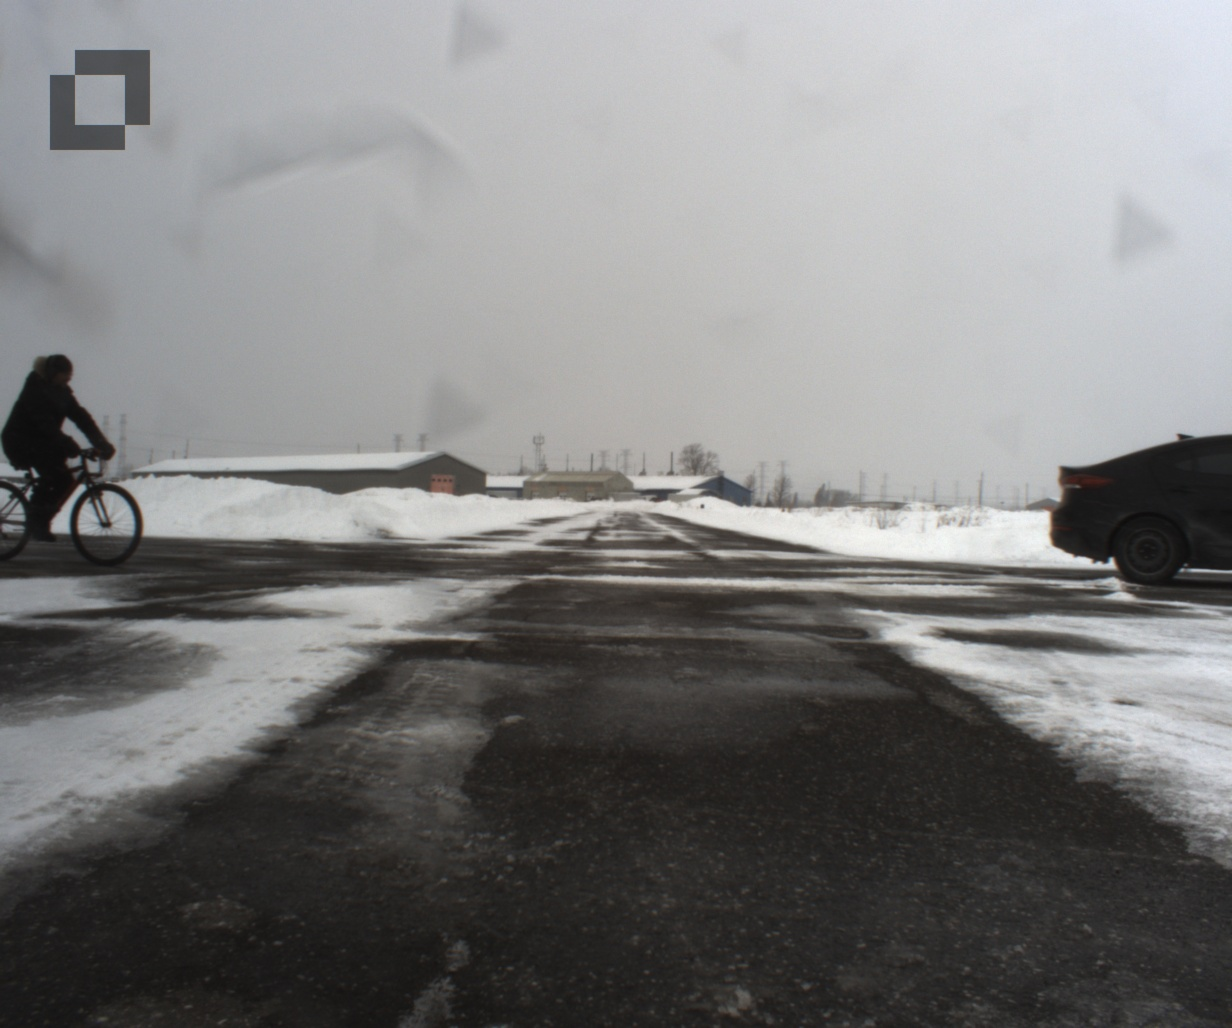

In [115]:
# Define paths
config_path = os.path.join(CARRADA_HOME, 'config.ini')
config = Configurable(config_path).config
warehouse = config['data']['warehouse']
carrada = os.path.join(warehouse, 'Carrada')
seq_path = os.path.join(carrada, seq_name)
rd_path = os.path.join(seq_path, 'range_doppler_numpy', frame_name + '.npy')
ra_path = os.path.join(seq_path, 'range_angle_numpy', frame_name + '.npy')
ad_path = os.path.join(seq_path, 'angle_doppler_processed', frame_name + '.npy')
img_path = os.path.join(seq_path, 'camera_images', frame_name + '.jpg')

'''
# Path to the RAD tensor (soon available)
rad_path = os.path.join(seq_path, 'RAD_numpy', frame_name + '.npy')
'''

annotations_path = os.path.join(carrada, 'annotations_frame_oriented.json')
# Load data

# Annotations
with open(annotations_path, 'r') as fp:
    annotations = json.load(fp)
annotations = annotations[seq_name][frame_name]  # Keep annotations of interest

# Range-angle and range-Doppler matrices
'''
# the RA and RD matrices can be computed directly from the RAD tensor
rad_matrix = np.load(rad_path)
data_transformer = DataTransformer(rad_matrix)
ra_matrix = data_transformer.to_ra()
rd_matrix = data_transformer.to_rd()
'''
ra_matrix = np.load(ra_path)
rd_matrix = np.load(rd_path)
ad_matrix = np.load(ad_path)
# Camera image of the scene
print('Camera image of the scene {}, frame {}'.format(seq_name, frame_name))
img = Image(img_path)
display(img)

Camera image of the scene 2020-02-28-13-14-35, frame 000173


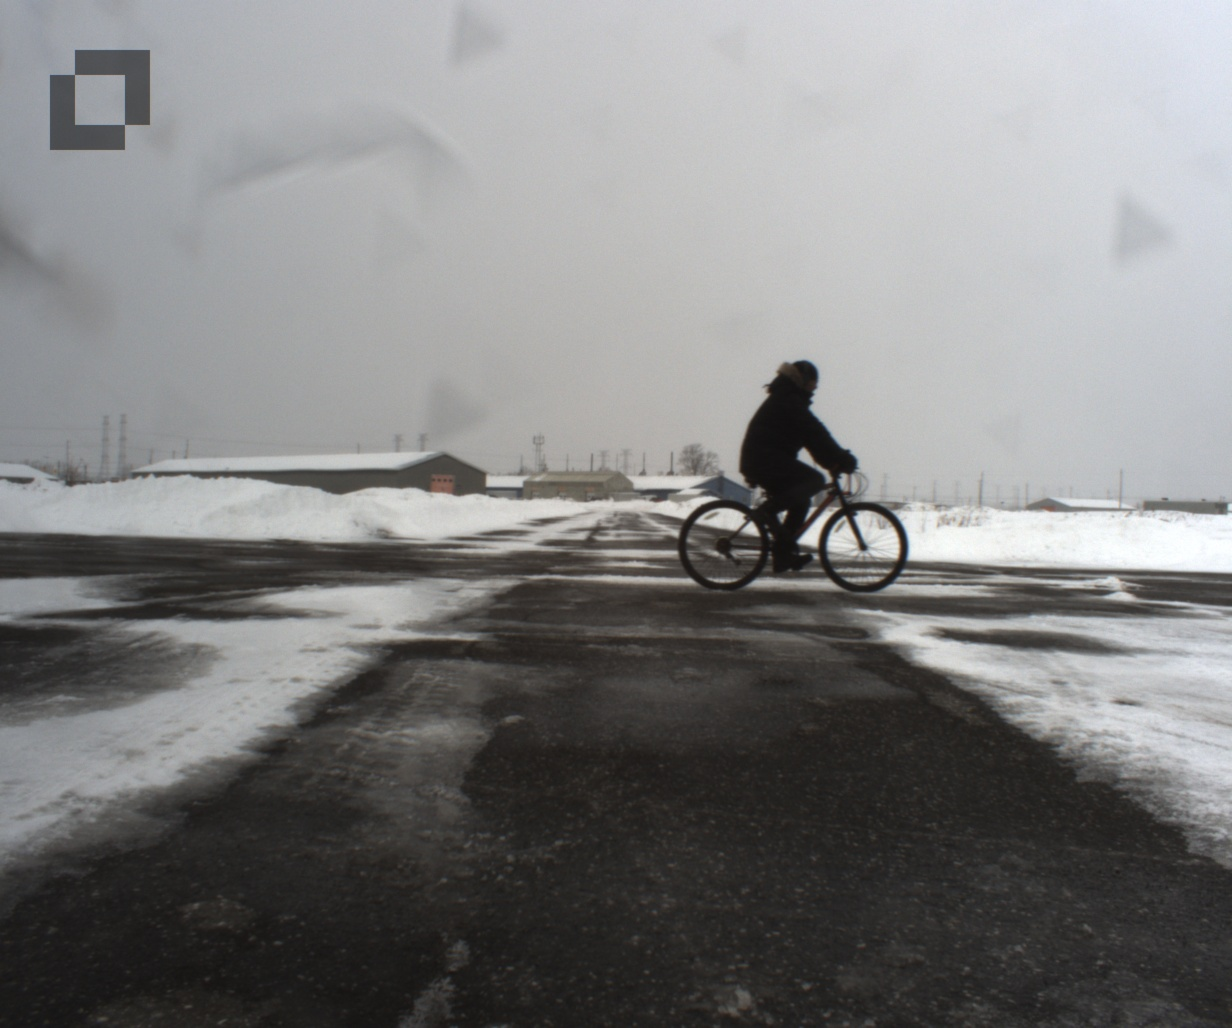

Raw Range-Doppler representation:


<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?


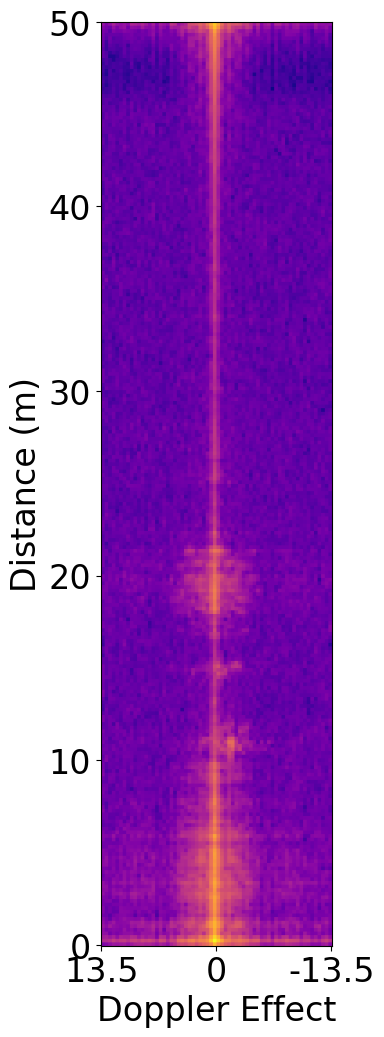

/tmp/ipykernel_27967/1529025922.py:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if annotation_type is 'sparse':
/tmp/ipykernel_27967/1529025922.py:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif annotation_type is 'dense':
/tmp/ipykernel_27967/1529025922.py:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if annotation_type is 'sparse':
/tmp/ipykernel_27967/1529025922.py:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif annotation_type is 'dense':
/tmp/ipykernel_27967/1529025922.py:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if annotation_type is 'sparse':
/tmp/ipykernel_27967/1529025922.py:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif annotation_type is 'dense':
/tmp/ipykernel_27967/1529025922.py:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if annotation_type is 'sparse':
/tmp/ipykernel_27967/1529025922.py:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif 

KeyError: '000010'

In [32]:
# Range-Doppler visualization
signal_visualizer = SignalVisualizer(rd_matrix)
print('Raw Range-Doppler representation:')
signal_visualizer.save_scale(path='.', signal_type='range_doppler', color_scale=False,
                             rotation=True, save_img=False, plot_img=True)
for annotation_type in ['sparse', 'dense', 'box']:
    for i, instance in enumerate(instances):
        points = annotations[instance]['range_doppler'][annotation_type]
        annot_generator = AnnotationGenerator(rd_matrix.shape, points)
        if annotation_type is 'sparse':
            annots = annot_generator.get_points()
        elif annotation_type is 'dense':
            annots = annot_generator.get_mask()
        else:
            annots = annot_generator.get_box()
        signal_visualizer.add_annotation(i, annots, annotation_type)
    print('Range-Doppler with {} annotations:'.format(annotation_type))
    signal_visualizer.save_multiple_annotations(path='/root/workspace/temp/rd_{}.png'.format(annotation_type),
                                                signal_type='range_doppler', color_scale=False,
                                                rotation=True, save_img=False, plot_img=True)
    signal_visualizer.reset_annotation()

<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?


Raw Range-Angle representation:


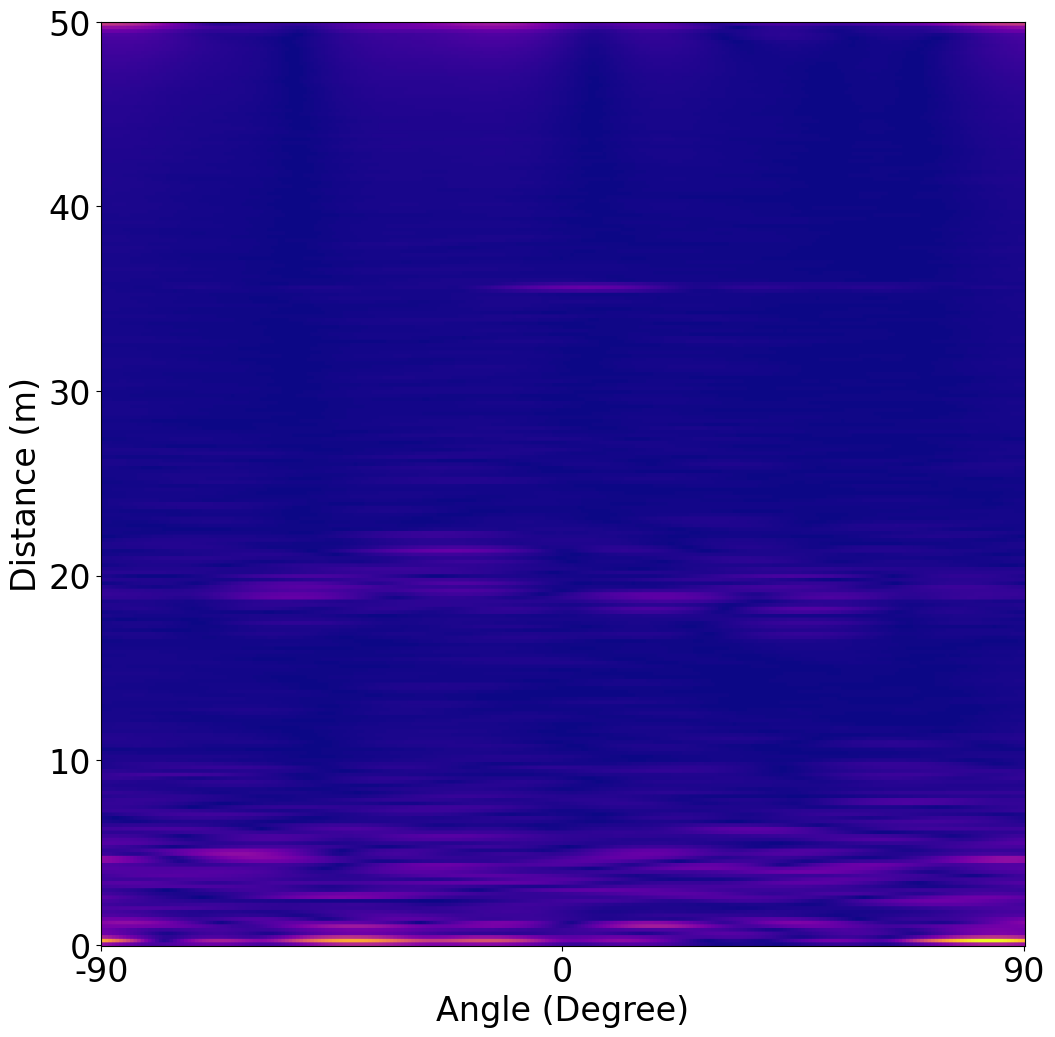

/tmp/ipykernel_27616/3271338884.py:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if annotation_type is 'sparse':
/tmp/ipykernel_27616/3271338884.py:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif annotation_type is 'dense':
/tmp/ipykernel_27616/3271338884.py:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if annotation_type is 'sparse':
/tmp/ipykernel_27616/3271338884.py:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif annotation_type is 'dense':
/tmp/ipykernel_27616/3271338884.py:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if annotation_type is 'sparse':
/tmp/ipykernel_27616/3271338884.py:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif annotation_type is 'dense':
/tmp/ipykernel_27616/3271338884.py:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if annotation_type is 'sparse':
/tmp/ipykernel_27616/3271338884.py:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif 

KeyError: '000015'

In [8]:
# Range-Angle visualization

signal_visualizer = SignalVisualizer(ra_matrix)
print('Raw Range-Angle representation:')
signal_visualizer.save_scale(path='.', signal_type='range_angle', color_scale=False,
                             rotation=False, save_img=False, plot_img=True)
for annotation_type in ['sparse', 'dense', 'box']:
    for i, instance in enumerate(instances):
        points = annotations[instance]['range_angle'][annotation_type]
        annot_generator = AnnotationGenerator(ra_matrix.shape, points)
        if annotation_type is 'sparse':
            annots = annot_generator.get_points()
        elif annotation_type is 'dense':
            annots = annot_generator.get_mask()
        else:
            annots = annot_generator.get_box()
        signal_visualizer.add_annotation(i, annots, annotation_type)
    print('Range-Angle with {} annotations:'.format(annotation_type))
    signal_visualizer.save_multiple_annotations(path='/root/workspace/temp/ra_{}.png'.format(annotation_type),
                                                signal_type='range_angle', color_scale=False,
                                                rotation=False, save_img=False, plot_img=True)
    signal_visualizer.reset_annotation()

Raw Angle-Doppler representation:


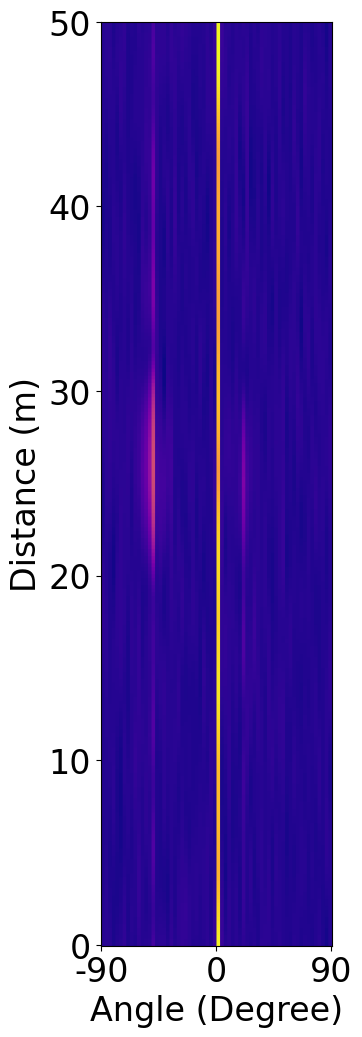

Range-Angle with sparse annotations:


Exception: You need to add annotation before visualize it!

In [9]:
# Range-Angle visualization

signal_visualizer = SignalVisualizer(ad_matrix)
print('Raw Angle-Doppler representation:')
signal_visualizer.save_scale(path='.', signal_type='angle_doppler', color_scale=False,
                             rotation=False, save_img=False, plot_img=True)
print('Range-Angle with {} annotations:'.format(annotation_type))
signal_visualizer.save_multiple_annotations(path='/root/workspace/temp/ra_{}.png'.format(annotation_type),
                                            signal_type='range_angle', color_scale=False,
                                            rotation=False, save_img=False, plot_img=True)
signal_visualizer.reset_annotation()

In [27]:
matrix = ad_matrix
min_value, max_value = np.min(matrix), np.max(matrix)
cmap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=min_value, vmax=max_value)
colored_matrix = cmap(norm(matrix))
colored_matrix = colored_matrix[:, :, :3]
x_shape, y_shape, _ = colored_matrix.shape
color_scale_params = [cmap, norm]

ValueError: x and y can be no greater than 2D, but have shapes (256,) and (256, 64, 3)

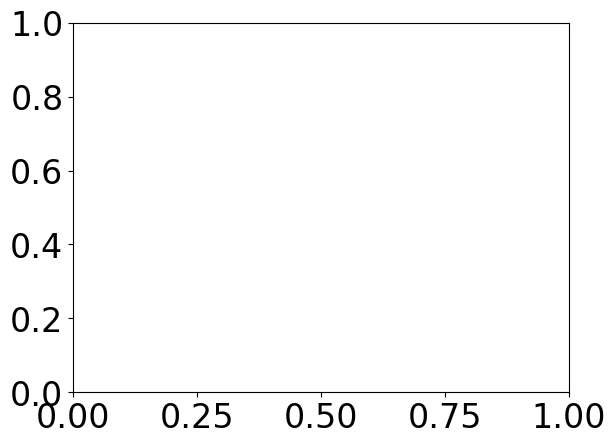

In [30]:
plt.plot(colored_matrix)

In [29]:

import matplotlib.colors as colors
import matplotlib.pyplot as plt
plt.show(ad_matrix)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()